In [11]:
#create a pandas dataframe
import pandas as pd
path_gen = 'all_models_generic.csv'
df_gen = pd.read_csv(path_gen)
df_g = df_gen.drop(['Unnamed: 0'], axis=1)

path_sc = 'all_models_single_constraint.csv'
df_sc = pd.read_csv(path_sc)
df_sc = df_sc.drop(['Unnamed: 0'], axis=1)

In [12]:
from collections import Counter
import numpy as np

def gini_index(words):
    # Count the frequency of each word
    word_counts = Counter(words)
    frequencies = list(word_counts.values())

    n = len(frequencies)

    frequencies = np.array(frequencies)
    frequencies.sort()
    cumulative_frequencies = np.cumsum(frequencies)

    total = cumulative_frequencies[-1]
    gini = (n + 1 - 2 * np.sum(cumulative_frequencies) / total) / n

    return gini

def entropy(words):

    word_counts = Counter(words)
    frequencies = list(word_counts.values())
    # print(frequencies)
    # Convert counts to probabilities
    total = sum(frequencies)
    probabilities = [count / total for count in frequencies]

    # Calculate entropy
    entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)
    return entropy

def theil_index(words):
    word_counts = Counter(words)
    total_words = sum(word_counts.values())

    word_probs = np.array([count / total_words for count in word_counts.values()])

    theil_index_value = np.sum(word_probs * np.log(word_probs / np.mean(word_probs)))

    return theil_index_value

def concentration_index(words, i):

    word_counts = Counter(words)
    frequencies = np.array(list(word_counts.values()))
    sorted_frequencies = np.sort(frequencies)[::-1]  # Sort in descending order
    total_words = np.sum(sorted_frequencies)

    # Calculate the concentration index for the top 'i' categories
    if i > len(sorted_frequencies):
        # Contingency
        print(f"Warning: i is greater than the number of unique words. Using all words instead.")
        i = len(sorted_frequencies)

    top_i_frequencies = sorted_frequencies[:i]
    concentration_ratio = np.sum(top_i_frequencies) / total_words

    return concentration_ratio

In [13]:
# #  Verifying the Gini computation using another function (redundant code, function not used)
# def gini_index2(words):
#     # Count the frequency of each word
#     word_counts = Counter(words)
#     frequencies = list(word_counts.values())

#     n = len(frequencies)

#     frequencies = np.array(frequencies)
#     array = frequencies
#     array = np.sort(array)
#     # Index per array element:
#     index = np.arange(1,array.shape[0]+1)
#     # Number of array elements:
#     n = array.shape[0]
#     # Gini coefficient:
#     gini = ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))
#     return gini

Based on domain

In [14]:
all_gini_g = []
all_entropy_g =[]
all_theil_g =[]
all_doms_g = []
all_conc_g = []

all_gini_sc = []
all_entropy_sc =[]
all_theil_sc=[]
all_doms_sc = []
all_conc_sc = []

# For calculating concentration index, specify how many (top) words to consider
k = 5

# Classify according to domain
# Generic
for domain in ['relocation', 'opening_business', 'tourism']:

    df_dom = df_g[df_g['situation']==domain] # gini index within the same domain
    prompts = df_dom.prompt.unique()

    for prompt in prompts:
        df_prmp = df_dom[df_dom['prompt']==prompt]

        all_cities = []
        for row in range(len(df_prmp.index)):
          for rec in ['rec_city1', 'rec_city2', 'rec_city3', 'rec_city4', 'rec_city5']:
              city = df_prmp.iloc[row][rec]
              city = city.split(",")[0]
              # preprocess text (rm punctuations)
              city = city.lower()

              # append to list
              all_cities.append(city)
        gini_prompt = gini_index(all_cities)
        entropy_prompt = entropy(all_cities)
        theil_prompt = theil_index(all_cities)
        conc_prompt = concentration_index(all_cities, k)

        all_gini_g.append(gini_prompt)
        all_entropy_g.append(entropy_prompt)
        all_theil_g.append(theil_prompt)
        all_conc_g.append(conc_prompt)
        all_doms_g.append(domain)

# SC
for domain in ['relocation', 'opening_business', 'tourism']:

    df_dom = df_sc[df_sc['situation']==domain]
    prompts = df_dom.prompt.unique()

    for prompt in prompts:
        df_prmp = df_dom[df_dom['prompt']==prompt]

        all_cities = []
        for row in range(len(df_prmp.index)):
          for rec in ['rec_city1', 'rec_city2', 'rec_city3', 'rec_city4', 'rec_city5']:
              city = df_prmp.iloc[row][rec]
              city = city.split(",")[0]
              # preprocess text (rm punctuations)
              city = city.lower()

              # append to list
              all_cities.append(city)

        gini_prompt = gini_index(all_cities)
        entropy_prompt = entropy(all_cities)
        theil_prompt = theil_index(all_cities)
        conc_prompt = concentration_index(all_cities, k)

        all_gini_sc.append(gini_prompt)
        all_entropy_sc.append(entropy_prompt)
        all_theil_sc.append(theil_prompt)
        all_conc_sc.append(conc_prompt)
        all_doms_sc.append(domain)

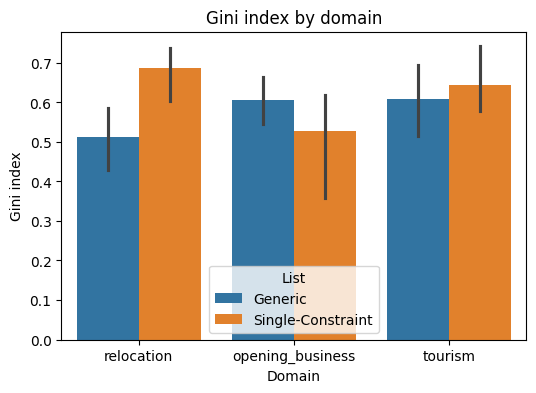

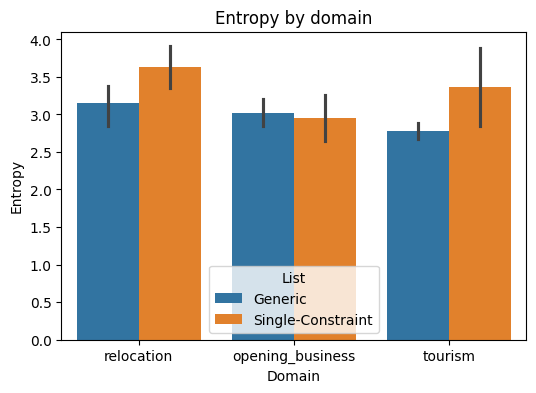

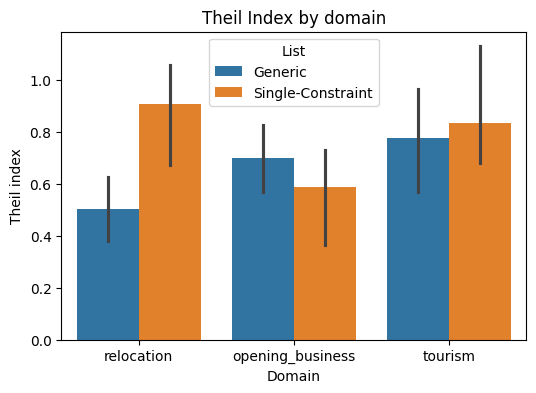

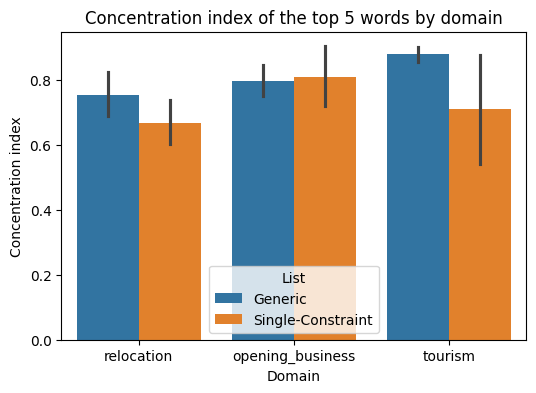

In [15]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gini plot
data = pd.DataFrame({
    'Domain': all_doms_g + all_doms_sc,
    'Gini index': all_gini_g + all_gini_sc,
    'List': ['Generic'] * len(all_gini_g) + ['Single-Constraint'] * len(all_gini_sc)
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Domain', y='Gini index', hue='List', data=data)
plt.title('Gini index by domain')
plt.show()

# Entropy plot
data = pd.DataFrame({
    'Domain': all_doms_g + all_doms_sc,
    'Entropy': all_entropy_g + all_entropy_sc,
    'List': ['Generic'] * len(all_entropy_g) + ['Single-Constraint'] * len(all_entropy_sc)
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Domain', y='Entropy', hue='List', data=data)
plt.title('Entropy by domain')
plt.show()

# Theil plot
data = pd.DataFrame({
    'Domain': all_doms_g + all_doms_sc,
    'Theil index': all_theil_g + all_theil_sc,
    'List': ['Generic'] * len(all_theil_g) + ['Single-Constraint'] * len(all_theil_sc)
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Domain', y='Theil index', hue='List', data=data)
plt.title('Theil Index by domain')
plt.show()

# Concentration index plot
data = pd.DataFrame({
    'Domain': all_doms_g + all_doms_sc,
    'Concentration index': all_conc_g + all_conc_sc,
    'List': ['Generic'] * len(all_conc_g) + ['Single-Constraint'] * len(all_conc_sc)
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Domain', y='Concentration index', hue='List', data=data)
plt.title('Concentration index of the top '+str(k)+' words by domain')
plt.show()

Based on different LLM systems

In [16]:
all_gini_g = []
all_entropy_g = []
all_theil_g = []
all_conc_g = []
all_sys_g = []

all_gini_sc = []
all_entropy_sc = []
all_theil_sc = []
all_conc_sc=[]
all_sys_sc = []

# Classify according to system
# Generic
for system in ['gemma', 'gpt35', 'claude35', 'gpt4o', 'llama31', 'mistral']:
    df_dom = df_g[df_g['model']==system] # gini index within the same system
    prompts = df_dom.prompt.unique()

    for prompt in prompts:
        df_prmp = df_dom[df_dom['prompt']==prompt]

        all_cities = []
        for row in range(len(df_prmp.index)):
          for rec in ['rec_city1', 'rec_city2', 'rec_city3', 'rec_city4', 'rec_city5']:
              city = df_prmp.iloc[row][rec]
              city = city.split(",")[0]
              # preprocess text (rm punctuations)
              city = city.lower()

              # append to list
              all_cities.append(city)
        gini_prompt = gini_index(all_cities)
        entropy_prompt = entropy(all_cities)
        theil_prompt = theil_index(all_cities)
        conc_prompt = concentration_index(all_cities, k)

        all_gini_g.append(gini_prompt)
        all_entropy_g.append(entropy_prompt)
        all_theil_g.append(theil_prompt)
        all_conc_g.append(conc_prompt)
        all_sys_g.append(system)

# SC
for system in ['gemma', 'gpt35', 'claude35', 'gpt4o', 'llama31', 'mistral']:
    df_dom = df_sc[df_sc['model']==system] # gini index within the same system
    prompts = df_dom.prompt.unique()

    for prompt in prompts:
        df_prmp = df_dom[df_dom['prompt']==prompt]

        all_cities = []
        for row in range(len(df_prmp.index)):
          for rec in ['rec_city1', 'rec_city2', 'rec_city3', 'rec_city4', 'rec_city5']:
              city = df_prmp.iloc[row][rec]
              city = city.split(",")[0]
              # preprocess text (rm punctuations)
              city = city.lower()

              # append to list
              all_cities.append(city)
        gini_prompt = gini_index(all_cities)
        entropy_prompt = entropy(all_cities)
        theil_prompt = theil_index(all_cities)
        conc_prompt = concentration_index(all_cities, k)

        all_gini_sc.append(gini_prompt)
        all_entropy_sc.append(entropy_prompt)
        all_theil_sc.append(theil_prompt)
        all_conc_sc.append(conc_prompt)
        all_sys_sc.append(system)

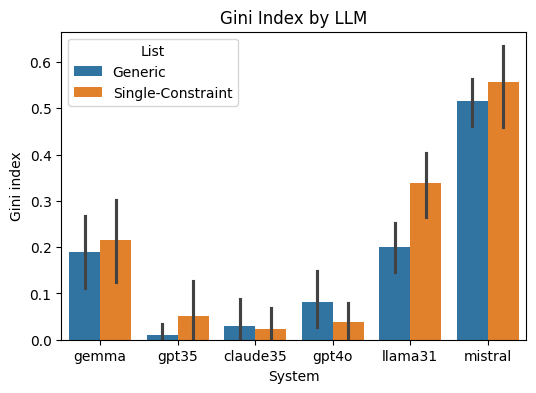

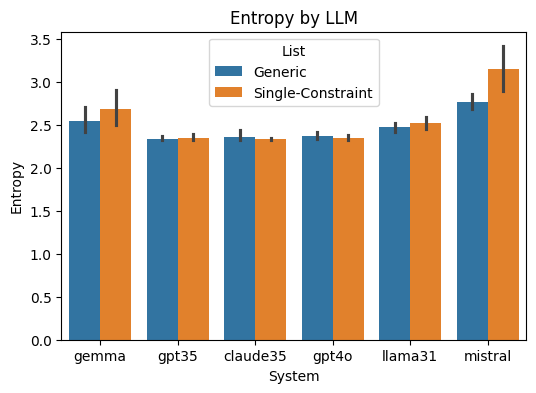

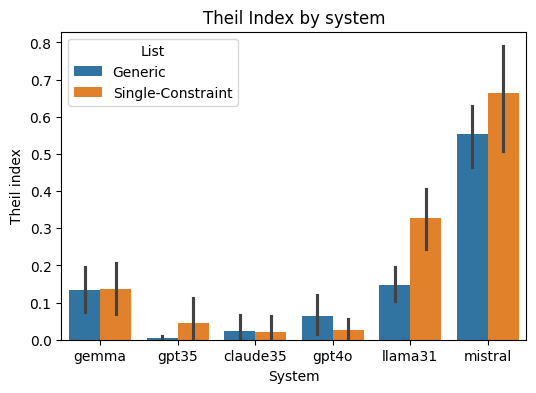

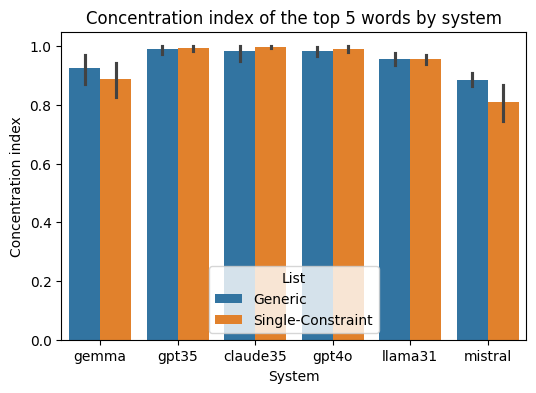

In [17]:
# Plot prompt-wise
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame
data = pd.DataFrame({
    'System': all_sys_g + all_sys_sc,
    'Gini index': all_gini_g + all_gini_sc,
    'List': ['Generic'] * len(all_gini_g) + ['Single-Constraint'] * len(all_gini_sc)
})

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='System', y='Gini index', hue='List', data=data)
plt.title('Gini Index by LLM')
plt.show()

# Create a DataFrame
data = pd.DataFrame({
    'System': all_sys_g + all_sys_sc,
    'Entropy': all_entropy_g + all_entropy_sc,
    'List': ['Generic'] * len(all_entropy_g) + ['Single-Constraint'] * len(all_entropy_sc)
})

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='System', y='Entropy', hue='List', data=data)
plt.title('Entropy by LLM')
plt.show()


# Theil plot
data = pd.DataFrame({
    'System': all_sys_g + all_sys_sc,
    'Theil index': all_theil_g + all_theil_sc,
    'List': ['Generic'] * len(all_theil_g) + ['Single-Constraint'] * len(all_theil_sc)
})

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='System', y='Theil index', hue='List', data=data)
plt.title('Theil Index by system')
plt.show()

# Concentration index plot
data = pd.DataFrame({
    'System': all_sys_g + all_sys_sc,
    'Concentration index': all_conc_g + all_conc_sc,
    'List': ['Generic'] * len(all_conc_g) + ['Single-Constraint'] * len(all_conc_sc)
})

plt.figure(figsize=(6, 4))
sns.barplot(x='System', y='Concentration index', hue='List', data=data)
plt.title('Concentration index of the top '+str(k)+' words by system')
plt.show()